In [1]:
import sys
sys.path.append('/content/drive/My Drive/object_pose_estimation_online')
from Classes.CameraCalibration import *

In [2]:
# Declare baselink - target transformation matrix collection
baselink_target_transformations = []

In [3]:
# Needed file locations
intrinsic_camera_matrix_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files//intrinsic_camera_properties.npz'
mean_baselink_camera_transformation_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/mean_baselink_camera_transformation.npy'
robot_target_calibration_images_file = '/content/drive/My Drive/object_pose_estimation_online/data/robot_target_calibration_images/RTC_image_original_*.jpg'
mean_baselink_target_transformation_file = '/content/drive/My Drive/object_pose_estimation_online/data/matrix_files/mean_baselink_target_transformation'

In [4]:
# Load intrinsic camera matrix and distortion coefficients
mtx, dist = load_intrinsic_camera_matrix(intrinsic_camera_matrix_file)

In [5]:
# Import baselink-camera transformation matrix (numpy data)
bc_transform = get_numpy_data(mean_baselink_camera_transformation_file)

In [6]:
# Find all image paths
images = get_image_path_names(robot_target_calibration_images_file)

In [7]:
# Prepare object points in 3D space in meters
objp = get_object_points()

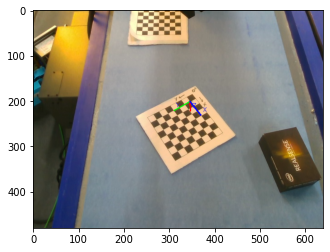

In [8]:
# Loop through all images and corresponding transformations
for image in images:

    # Read image
    frame = read_image(image)

    # Turn image to grayscale
    gray = image_to_grayscale(frame)

    # Find the corners in the chessbord calibration tool
    corners = find_corners(gray)

    # Get extrinsic camera calibration matrix (target - camera transform)
    ct_transform = extrinsic_calibration(frame, objp, corners, mtx, dist)

    # Get baselink - target transform
    bt_transform = multiply_transforms(bc_transform, ct_transform)

    # Add to the baselink_target_transformations list
    baselink_target_transformations.append(bt_transform)

In [9]:
# Mean baselink - camera transformation
mbt_transformation = compute_mean_transformation(baselink_target_transformations)

In [10]:
# Save the mean baselink - target transformation matrix
save_to_numpy(mean_baselink_target_transformation_file, mbt_transformation)

In [11]:
print("\nMean robot-target transformation")
print(mbt_transformation)
print('\nCamera-robot calibration finished')


Mean robot-target transformation
[[ 0.57942635 -0.8081212   0.1051796   0.02095953]
 [-0.80202214 -0.58834008 -0.10255193 -0.65825654]
 [ 0.14471806 -0.02493365 -0.98904677 -0.0438513 ]
 [ 0.          0.          0.          1.        ]]

Camera-robot calibration finished
